.Proyecto para el Parcial 1 "Proyecto covid 19"
Por Uriel Brenis Aguilar
Rafael Melchor Hernandez


1 Cargar el dataset 

In [2]:
#importaciones
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
df = pd.read_csv('pacientes_covid.csv') #carga del csv con la funcion read_csv
df.head()

,ID,Edad,Sexo,Temperatura,Presion_Sistolica,Presion_Diastolica,Frecuencia_Cardiaca,Nivel_Oxigeno,Enfermo_COVID,Hospitalizado
0,1,52,Hombre,35.5,155,75,89,97,No,Sí
1,2,15,Hombre,38.1,142,66,73,93,Sí,No
2,3,72,Mujer,35.8,140,76,66,81,No,No
3,4,61,Hombre,38.6,128,82,76,88,Sí,No
4,5,21,Mujer,35.9,140,85,103,84,Sí,Sí


2 Exploracion inicial
En la tabla se observan 10 columnas las cuales toman los valores de: ID: int64, Sexo: String, Temperatura: float64, Presion_Sistolica: int64, Presion_Diastolica: int64, Frecuencia_Cardiaca: int64, Nivel_Oxigeno: int64, Enfermo_COVID: bool, Hospitalizado: bool.
Ademas el csv cuenta con una dimension de 300 registros sinteticos.
En primeras filas podemos obsevar una muestra  heterogenea con una media de edad de 35.8 donde se muestra que hay mas hombres enfermos que mujeres asi que los mismos tiene un indice menor de ser hopitalizados copn respecto a las mujeres.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   300 non-null    int64  
 1   Edad                 300 non-null    int64  
 2   Sexo                 300 non-null    object 
 3   Temperatura          300 non-null    float64
 4   Presion_Sistolica    300 non-null    int64  
 5   Presion_Diastolica   300 non-null    int64  
 6   Frecuencia_Cardiaca  300 non-null    int64  
 7   Nivel_Oxigeno        300 non-null    int64  
 8   Enfermo_COVID        300 non-null    object 
 9   Hospitalizado        300 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 23.6+ KB


3 Cálculos básicos con Pandas/Numpy

Número total de pacientes.
se utiliza la funcion "len()" para obtener la longitud del dataset

In [3]:
total_pacientes = len(df)
print("Número total de pacientes:", total_pacientes)


Número total de pacientes: 300


Promedio de edad. Se aplica la funcion mean() sobre la columna Edad para cualcular el promedio de los valores que contenga.

In [4]:
prom_edad = df["Edad"].mean()
print(f"Promedio de edad: {prom_edad:.2f} años")


Promedio de edad: 43.86 años


Paciente más joven y más viejo:
Se aplica la funcion min() y max() sobre la columna Edad para obtener el valor mas bajo y mas alto respectivamente,
contenido en la columna

In [3]:
edad_min = df["Edad"].min()
edad_max = df["Edad"].max()
print(f"Edad mínima: {edad_min} años")
print(f"Edad máxima: {edad_max} años") 


Edad mínima: 1 años
Edad máxima: 89 años


Promedio de temperatura. Se aplica la funcion mean() sobre la columna Temperatura para cualcular el promedio de los valores que contenga.
Nota: uso de f-string para imprimir la variable a 2 decimales

In [4]:
prom_temp = df["Temperatura"].mean()
print(prom_temp)
print(f"Promedio de temperatura: {prom_temp:.2f} °C")


36.994
Promedio de temperatura: 36.99 °C


Promedio de saturación de oxígeno en pacientes enfermos vs sanos. Para ambos casos, se obtienen aquellos registros donde en el apartado
"Enfermo_COVID" sean "Sí" o "No" segun sea el caso, para despues obtener sus respectivos promedios mediante mean() en la columuna (Nivel_Oxigeno).
Finalmete se redondea el resultado para obtener un porcentage entero

enfermos = df[df["Enfermo_COVID"] == "Sí"]
promedioEnfermos = enfermos["Nivel_Oxigeno"].mean()
print("Promedio de saturacion de oxigeno en pacientes enfermos: ",round(promedioEnfermos))
sanos = df[df["Enfermo_COVID"] == "No"]
promedioSanos = sanos["Nivel_Oxigeno"].mean()
print("Promedio de saturacion de oxigeno en pacientes sanos:",round(promedioSanos))

4 Análisis demográfico y clínico

numero de mujeres sanas y enfermas.  en ambos casos,aplica una condicion logica donde para la columna sexo sea mujer y para
la columna Enfermo_COVID es a falso para el primer caso y verdadero para el segundo

In [10]:
m_sanas = len(df[(df["Sexo"] == "Mujer") & (df["Enfermo_COVID"] == "No")])
m_enfermas = len(df[(df["Sexo"] == "Mujer") & (df["Enfermo_COVID"] == "Sí")])

print(f"El numero de mujeres sanas es: {m_sanas}")
print(f"El numero de mujeres enfermas  es: {m_enfermas}")

El numero de mujeres sanas es: 65
El numero de mujeres enfermas  es: 95


numero de hombres sanos y enfermos.  en ambos casos,aplica una condicion logica donde para la columna sexo sea hombre y para
la columna Enfermo_COVID es a falso para el primer caso y verdadero para el segundo

In [4]:
h_sanos = len(df[(df["Sexo"] == "Hombre") & (df["Enfermo_COVID"] == "No")])
h_enfermos = len(df[(df["Sexo"] == "Hombre") & (df["Enfermo_COVID"] == "Sí")])

print(f"El numero de hombres sanos es: {h_sanos}")
print(f"El numero de hombres enfermos  es: {h_enfermos}")

El numero de hombres sanos es: 51
El numero de hombres enfermos  es: 89


In [15]:
ninos = df[df["Edad"]<=12]
jovenes = df[(df["Edad"]<31) & (df["Edad"]>12)]
adultos = df[(df["Edad"]<60) & (df["Edad"]>30)]
adultosMayores = df[df["Edad"]>60]

enfermosNinos = len(ninos[ninos["Enfermo_COVID"] == "Sí"])
sanosNinos = len(ninos[ninos["Enfermo_COVID"] == "No"])

enfermosjovenes = len(jovenes[jovenes["Enfermo_COVID"] == "Sí"])
sanosjovenes = len(jovenes[jovenes["Enfermo_COVID"] == "No"])

enfermosadultos = len(adultos[adultos["Enfermo_COVID"] == "Sí"])
sanosadultos = len(adultos[adultos["Enfermo_COVID"] == "No"])

enfermosadultosMayores = len(adultosMayores[adultosMayores["Enfermo_COVID"] == "Sí"])
sanosadultosMayores = len(adultosMayores[adultosMayores["Enfermo_COVID"] == "No"])

print(f"El numero de ninos enfermos: {enfermosNinos}")
print(f"El numero de ninos sanos: {sanosNinos}")

print(f"El numero de jovenes enfermos: {enfermosjovenes}")
print(f"El numero de jovenes sanos: {sanosjovenes}")

print(f"El numero de adultos enfermos: {enfermosadultos}")
print(f"El numero de adultos sanos: {sanosadultos}")

print(f"El numero de adultos mayores enfermos: {enfermosadultosMayores}")
print(f"El numero de adultos mayores sanos: {sanosadultosMayores}")



El numero de ninos enfermos: 34
El numero de ninos sanos: 15
El numero de jovenes enfermos: 27
El numero de jovenes sanos: 27
El numero de adultos enfermos: 61
El numero de adultos sanos: 35
El numero de adultos mayores enfermos: 61
El numero de adultos mayores sanos: 34


In [32]:
numeroHopitalizados = (100*(len(df[df["Hospitalizado"] == "Sí"])))/(len(df))
numeroNoHopitalizados = (100*(len(df[df["Hospitalizado"] == "No"])))/(len(df))
print(f"porcentaje de hospitalizados: {numeroHopitalizados:.0f} %")
print(f"porcentaje de no hospitalizados: {numeroNoHopitalizados:.0f} %")

porcentaje de hospitalizados: 32 %
porcentaje de no hospitalizados: 68 %


5 Visualizaciones con Matplotlib/Seaborn:

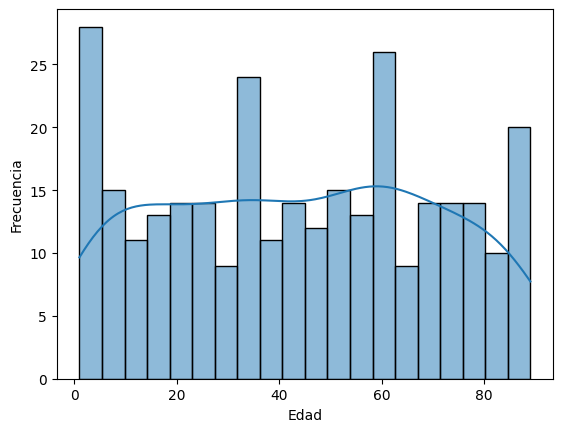

In [44]:
sn.histplot(data=df, x="Edad", bins=20, kde=True)
plt.ylabel("Frecuencia")
plt.show()

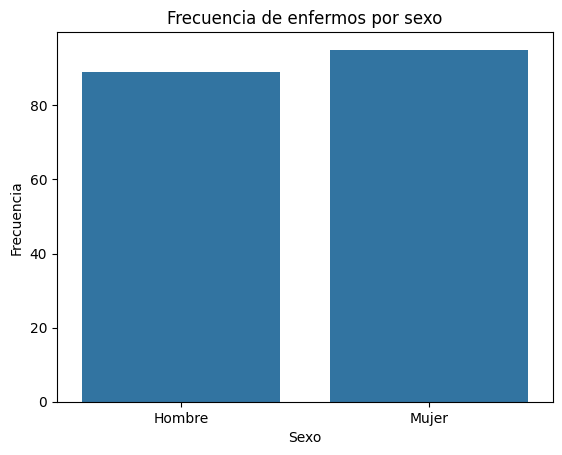

In [3]:
enfermos = df[df["Enfermo_COVID"]=="Sí"]

sn.countplot(data=enfermos, x="Sexo")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de enfermos por sexo")
plt.show()

